# 6.10: Unsupervised Learning Exercises

In [1]:
# Load libraries and objects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage

### Principal Components Analysis
In this lab, we perform PCA on `USArrests`. This is a standard R package which get in Python using `get_rdataset()`

In [2]:
USArrests = get_rdataset('USArrests').data
USArrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [3]:
# Let's take a look at our data
.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [4]:
USArrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [5]:
# Examine the variance of the four variables using the var() method
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

If the variables are measured in different units or vary widely in scale, it is recommended to standardize the variables to have standard deviation one before performing PCA. We can do this via the `StandardScaler()` transform imported above. 

In [6]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)

In [ ]:
# Perform principal components analysis
pcaUS = PCA()

# Fit
pcaUS.fit(USArrests_scaled)

In [ ]:
# Check means of the variables
pcaUS.mean_

In [ ]:
# Compute scores
scores = pcaUS.transform(USArrests_scaled)

In [ ]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, pcaUS.components_[i,k], pcaUS.components_[j,k])
    ax.text(pcaUS.components_[i,k],
            pcaUS.components_[j,k],
            USArrests.columns[k])

In [ ]:
scale_arrow = s_ = 2
scores[:,1] *= -1
pcaUS.components_[1] *= -1 # flip the y-axis
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, s_*pcaUS.components_[i,k], s_*pcaUS.components_[j,k])
    ax.text(s_*pcaUS.components_[i,k],
            s_*pcaUS.components_[j,k],
            USArrests.columns[k])

Let's take a look at the outputs

In [ ]:
# Standard deviation
scores.std(0, ddof=1)

In [ ]:
# Variance of each score
pcaUS.explained_variance_

In [ ]:
# The proportion of variance explained by each principal component (PVE) 
pcaUS.explained_variance_ratio_

In [ ]:
# Plot the proportion of variance explained
ticks = np.arange(1, len(pcaUS.explained_variance_ratio_) + 1)
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.plot(ticks,
        pcaUS.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
plt.show()

### Matrix Completion

We will turn our `USArrests` data into a matrix.

We now omit 20 entries in the $50$ x $4$ data matrix at random. We do so by first selecting 20 rows (states) at random, and then selecting one of the four entries in each row at random. This ensures that every row has at least three observed values.

In [ ]:
n_omit = 20
np.random.seed(15)
X = USArrests.values
r_idx = np.random.choice(np.arange(X.shape[0]),
                         n_omit,
                         replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]),
                         n_omit,
                         replace=True)
Xna = X.copy()
Xna[r_idx, c_idx] = np.nan

To start, we replace the missing values with the column means of the non-missing entries. 

In [ ]:
# Convert Xna to NumPy array

Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0)
Xhat[r_idx, c_idx] = Xbar[c_idx]

def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X)
    L = U[:,:M] * D[None,:M]
    return L.dot(V[:M])

# Measure progress
thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna)
mssold = np.mean(Xhat[~ismiss]**2)
mss0 = np.mean(Xna[~ismiss]**2)

In Step 2(a) of Algorithm 12.1, we  approximate `Xhat` using `low_rank()`; we call this `Xapp`. In Step 2(b), we  use `Xapp`  to update the estimates for elements in `Xhat` that are missing in `Xna`. Finally, in Step 2(c), we compute the relative error. These three steps are contained in the following `while` loop:

In [ ]:

while rel_err > thresh:
    count += 1
    # Step 2(a)
    Xapp = low_rank(Xhat, M=1)
    # Step 2(b)
    Xhat[ismiss] = Xapp[ismiss]
    # Step 2(c)
    mss = np.mean(((Xna - Xapp)[~ismiss])**2)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
          .format(count, mss, rel_err))

### $K$-Means Clustering

The estimator `sklearn.cluster.KMeans()`  performs $K$-means clustering in
`Python`.  We begin with a simple simulated example in which there
truly are two clusters in the data: the first 25 observations have a
mean shift relative to the next 25 observations.


In [8]:
np.random.seed(0);
X = np.random.standard_normal((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;

We now perform $K$-means clustering with $K=2$.

In [9]:
kmeans = KMeans(n_clusters=2,
                random_state=16, # for reproducibility
                n_init=20).fit(X)

In [10]:
# Find cluster assignments
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

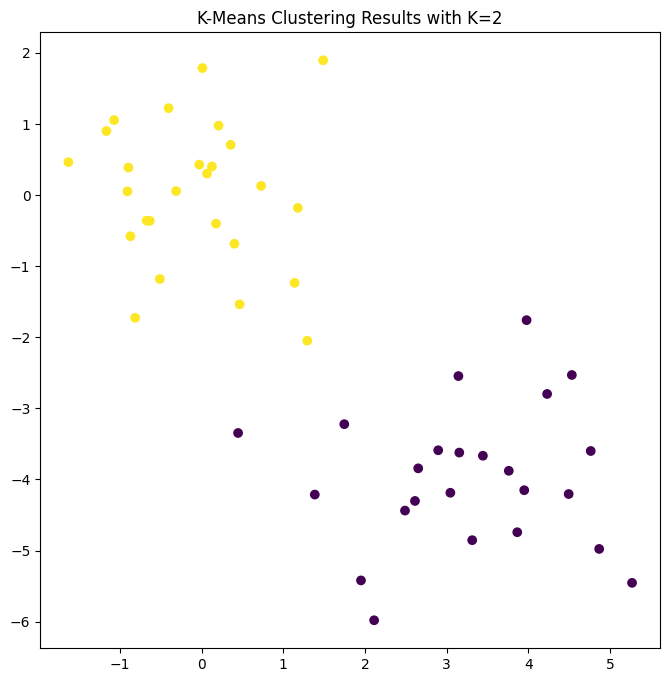

In [13]:
# Plot our findings
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");

We knew there were 2 groups in this dataset but in real life we would not. So, let's see how K-means does with $K = 3$ clusters.


Text(0.5, 1.0, 'K-Means Clustering Results with K=3')

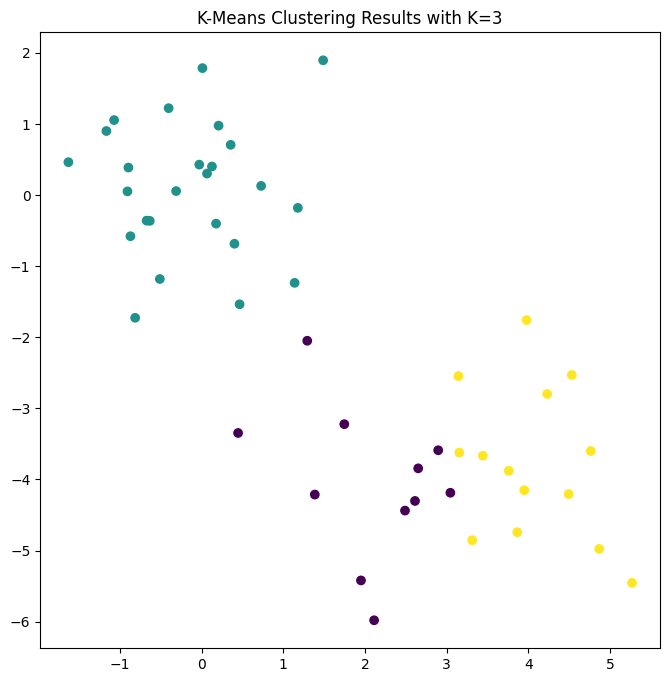

In [14]:
kmeans = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(X)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3")

When $K=3$, $K$-means clustering  splits up the two clusters.
We have used the `n_init` argument to run the $K$-means with 20 
initial cluster assignments (the default is 10). If a
value of `n_init` greater than one is used, then $K$-means
clustering will be performed using multiple random assignments in
Step 1 and the `KMeans()` 
function will report only the best results. Here we compare using
`n_init=1` to `n_init=20`.


In [ ]:
kmeans1 = KMeans(n_clusters=3,
                random_state=3,
                n_init=1).fit(X)
kmeans20 = KMeans(n_clusters=3,
                  random_state=3,
                  n_init=20).fit(X);
kmeans1.inertia_, kmeans20.inertia_

### Hierarchical Clustering

The `AgglomerativeClustering()`  class from
the `sklearn.clustering` package implements hierarchical clustering.
As its
name is long, we use the short hand `HClust` for *hierarchical clustering*.

In [ ]:
# Start by clustering observations using complete linkage
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(X)

In [ ]:
hc_avg = HClust(distance_threshold=0,
                n_clusters=None,
                linkage='average');
hc_avg.fit(X)
hc_sing = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='single');
hc_sing.fit(X);

In [ ]:
# Plot the dendrograms
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs);

To determine the cluster labels for each observation associated with a
given cut of the dendrogram, we can use the `cut_tree()` 
function from `scipy.cluster.hierarchy`

In [ ]:
cut_tree(linkage_comp, n_clusters=4).T

This can also be achieved by providing an argument `n_clusters`
to `HClust()`; however each cut would require recomputing
the clustering. Similarly, trees may be cut by distance threshold
with an argument of `distance_threshold` to `HClust()`
or `height` to `cut_tree()`.

In [ ]:
cut_tree(linkage_comp, height=5)

In [ ]:
# Scale the variables before performing hierarchical clustering of the observations (use StandardScaler())
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
hc_comp_scale = HClust(distance_threshold=0,
                       n_clusters=None,
                       linkage='complete').fit(X_scale)
linkage_comp_scale = compute_linkage(hc_comp_scale)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scale, ax=ax, **cargs)
ax.set_title("Hierarchical Clustering with Scaled Features");

Correlation-based distances between observations can be used for
clustering. The correlation between two observations measures the
similarity of their feature values.

In [ ]:
X = np.random.standard_normal((30, 3))
corD = 1 - np.corrcoef(X)
hc_cor = HClust(linkage='complete',
                distance_threshold=0,
                n_clusters=None,
                metric='precomputed')
hc_cor.fit(corD)
linkage_cor = compute_linkage(hc_cor)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_cor, ax=ax, **cargs)
ax.set_title("Complete Linkage with Correlation-Based Dissimilarity");

*These exercises were adapted from :* James, Gareth, et al. An Introduction to Statistical Learning: with Applications in Python, Springer, 2023.